<a href="https://colab.research.google.com/github/jorgecif/CovidDisinformationDetection/blob/main/CompMetDetDesinfCOVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detección de desinformación relacionada con COVID19** - Comparación de modelos de aprendizaje automático y aprendizaje profundo


> Por: Jorge Orlando Cifuentes Cifuentes




**Modelos a comparar**

*   Aprendizaje automático: Naïve Bayes, Random Forest, Logistic, SVM
*   Aprendizaje profundo: Redes neuronales básicas, redes neuronales convolucionales, redes neuronales recurrentes.


### Librerías y funciones

In [ ]:
# Generales
import warnings
warnings.filterwarnings('ignore')
#import csv
#import tensorflow as tf
import pandas as pd
import numpy as np
import joblib # Para exportar el modelo
import time

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression # Logistic
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.svm import LinearSVC # Support Vector
from sklearn.naive_bayes import MultinomialNB # Naive Bayes
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Machine learning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, Activation, Flatten


from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import EarlyStopping


import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model


In [ ]:
# Funciones para comparar modelos

def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['acc']) # Modifico "acc" por "accuracy"
    plt.plot(history.history['val_acc']) # Modifico "val_acc" por "val_accuracy"
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()
    
def plot_compare_losses(history1, history2, name1="Red 1",
                        name2="Red 2", title="Graph title"):
    """Compara losses de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2],
               loc='upper right')
    plt.show()
    
def plot_compare_accs(history1, history2, name1="Red 1",
                      name2="Red 2", title="Graph title"):
    """Compara accuracies de dos entrenamientos con nombres name1 y name2"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2], 
               loc='lower right')
    plt.show()

def plot_compare_accs3(history1, history2, history3, name1="Red 1",
                      name2="Red 2", name3="Red 3", title="Graph title"):
    """Compara accuracies de tres entrenamientos con nombres name1, name2 y name3"""
    plt.plot(history1.history['acc'], color="green")
    plt.plot(history1.history['val_acc'], 'r--', color="green")
    plt.plot(history2.history['acc'], color="blue")
    plt.plot(history2.history['val_acc'], 'r--', color="blue")
    plt.plot(history3.history['acc'], color="red")
    plt.plot(history3.history['val_acc'], 'r--', color="red")
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1,
                'Train ' + name2, 'Val ' + name2,  
                'Train ' + name3, 'Val ' + name3], 
               loc='lower right')
    plt.show()

def plot_compare_losses3(history1, history2, history3, name1="Red 1",
                        name2="Red 2", name3="Red 3", title="Graph title"):
    """Compara losses de tres entrenamientos con nombres name1, name2 y name3"""
    plt.plot(history1.history['loss'], color="green")
    plt.plot(history1.history['val_loss'], 'r--', color="green")
    plt.plot(history2.history['loss'], color="blue")
    plt.plot(history2.history['val_loss'], 'r--', color="blue")
    plt.plot(history3.history['loss'], color="red")
    plt.plot(history3.history['val_loss'], 'r--', color="red")
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train ' + name1, 'Val ' + name1, 
                'Train ' + name2, 'Val ' + name2,
                'Train ' + name3, 'Val ' + name3],
               loc='upper right')
    plt.show()



### Carga de datos

In [ ]:
# Carga de datos
#url_datos = 'https://github.com/jorgecif/CovidMisinformationDetection/blob/main/data/CovidHeadlinesDataset.xlsx?raw=true' 

url_datos="https://github.com/jorgecif/CovidDisinformationDetection/blob/main/data/CovidHeadlinesDataset2.xlsx?raw=true"

datos = pd.read_excel(url_datos)

print("Se han cargado ", datos.shape[0], " noticias")

# Muestra de los datos
print(len(datos))
datos.head(20)


Se han cargado  15357  noticias
15357


,Text,country,lang,label,URL,date,verificado_por
0,Britain’s Death Toll from the Coronavirus Riva...,United Kingdom,English,True,https://www.snopes.com/ap/2020/05/05/britains-...,2020-02-02 00:00:00,snopes
1,Timeline Reset: CDC Confirms Weeks-Earlier Cal...,United States,English,True,https://www.snopes.com/ap/2020/04/22/timeline-...,2020-06-03 00:00:00,snopes
2,"Dentists, Hair Salons, Beaches: Lockdowns Ease...",United States,English,True,https://www.snopes.com/ap/2020/04/20/dentists-...,2020-08-03 00:00:00,snopes
3,33 Million Have Sought US Unemployment Aid Sin...,United States,English,True,https://www.snopes.com/ap/2020/05/07/33-millio...,2020-09-03 00:00:00,snopes
4,United States ‘Wasted’ Months Before Preparing...,United States,English,True,https://www.snopes.com/ap/2020/04/05/u-s-waste...,2020-03-04 00:00:00,snopes
5,Was March 2020 the First March Since 2002 With...,United States,English,True,https://www.snopes.com/fact-check/march-2020-s...,2020-03-04 00:00:00,snopes
6,"US Intel: Coronavirus Not Manmade, Still Study...",United States,English,True,https://www.snopes.com/ap/2020/04/30/us-intel-...,2020-04-03 00:00:00,snopes
7,Astrologers had predicted the appearance of a ...,Ukraine,English,False,https://t.me/voxcheck/355,2020-03-14 00:00:00,VoxCheck
8,Ministry of Health confirms new case of coron...,Ecuador,English,False,https://www.facebook.com/EcuadorChequea/photos...,2020-03-02 00:00:00,Ecuador Chequea
9,The Vatican Confirms That Pope Francis Was Inf...,Middle East,English,False,https://misbar.com/factcheck/5e5bd565d4a229253...,2020-04-03 00:00:00,Misbar


In [ ]:
# Verifico si hay valores nulos
datos.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15357 entries, 0 to 15356
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Text            15357 non-null  object
 1   country         15357 non-null  object
 2   lang            15357 non-null  object
 3   label           15357 non-null  bool  
 4   URL             15259 non-null  object
 5   date            15183 non-null  object
 6   verificado_por  15357 non-null  object
dtypes: bool(1), object(6)
memory usage: 735.0+ KB


In [ ]:
#Elimino duplicados de todas las columnas

datos2 = datos.drop_duplicates()
print(len(datos2))

# Elimino ambiguedades

datos3=datos2.drop_duplicates(['Text'], keep='first') # Elimino ambieguedades
print(len(datos3))

15315
13045


In [ ]:
# Revuelvo los registros
datos3 = datos3.sample(frac = 1, random_state= 88) 
datos3=datos3.reset_index()
datos3=datos3.drop(["index"], axis=1)

# Muestra de los datos
datos3.head(10)
#print(len(datos))

,Text,country,lang,label,URL,date,verificado_por
0,There is an herbal cure for COVID-19.,Sri Lanka,English,False,http://u.afp.com/asafoetidacoronavirus,2020-02-27 00:00:00,u.afp
1,This graphics shows that the number of death ...,France,French,False,https://factuel.afp.com/non-ce-visuel-ne-montr...,2020/05/08,AFP
2,Central Park hospital tents housed thousands o...,United States,English,False,https://www.rappler.com/newsbreak/fact-check/2...,2020-05-03 00:00:00,PolitiFact
3,Having 14 face masks is enough. You can reuse ...,Taiwan,Korean,False,https://tfc-taiwan.org.tw/articles/2599,2020-02-18 00:00:00,Taiwan FactCheck Center
4,CRAS (a social care center) is distributing 49...,Brazil,Portuguese,False,https://tamil.factcrescendo.com/factcheck-musl...,2020-05-04 00:00:00,Agência Lupa
5,Ivermectine destroys coronavirus in 48 hours.,Colombia,Spanish,False,https://colombiacheck.com/chequeos/falta-mucho...,2020/04/08,Colombiacheck
6,The Torre Latinoamericana in Mexico City was ...,Mexico,Spanish,False,https://spondeomedia.com/falso-la-torre-latino...,2020/04/07,Spondeo Media
7,Americans singing Indian National Anthem than...,India,Hindi,False,https://www.factcrescendo.com/fact-check-ameri...,2020/04/26,FactCrescendo
8,Disinfectant gel causes cancer.,France,French,False,https://factuel.afp.com/non-le-gel-desinfectan...,2020/03/02,AFP
9,"Image of poor family in Uttar Pradesh, India ...",India,Tamil,False,https://leadstories.com/hoax-alert/2020/04/Fac...,2020-04-23 00:00:00,FactCrescendo


In [ ]:
# Descripción de los datos

datos3.describe(include="all")

,Text,country,lang,label,URL,date,verificado_por
count,13045,13045,13045,13045,12968,12894,13045
unique,13045,127,50,2,8225,315,129
top,The Simpsons predicted the coronavirus.,India,English,False,http://www.ecuadorchequea.com/las-mentiras-sob...,2020-04-03 00:00:00,AFP
freq,1,2380,6817,11921,14,680,971


### Exploración inicial de los datos

In [ ]:
# Reviso las 10 primeras categorías de cada variable categórica

for col in datos3.columns:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(datos3[col].value_counts().head(10))

----------------------------------------Text---------------------------------------- - 

The Simpsons predicted the coronavirus.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

----------------------------------------country---------------------------------------- - 

India            2380
United States    1986
Spain             889
Brazil            714
France            500
Philippines       385
Colombia          340
Australia         302
Italy             298
China             289
Name: country, dtype: int64

----------------------------------------lang---------------------------------------- - 

English       6817
Spanish       1808
Portuguese     690
French         601
tl             505
Hindi          280
Italian        222
Arabic         136
Indonesian     115
Malayalam      114
Name: lang, dtype: int64

----------------------------------------label---------------------------------------- - 

False    11921
True      1124
Name: label, dtype: int64

----------------------------------------URL---------------------------------------- - 

http://www.ecuadorchequea.com/las-mentiras-sobre-el-covid-19-en-ecuador/                                                                         14
https://observers.france24.com/fr/20200130-intox-chine-soupe-chauve-souris-rumeur-origine-coronavirus                                             7
http://news.jtbc.joins.com/html/040/NB11932040.html                                                                                               5
https://www.newtral.es/el-washington-post-no-ha-confirmado-el-origen-del-paciente-cero-del-coronavirus/20200418/                                  4
https://factcheck.afp.com/story-originated-parody-account-no-driver-threatening-spread-covid-19-across-nigeria                                    4
https://piaui.folha.uol.com.br/lupa/2020/01/27/verificamos-coronavirus-infectou-28-milhoes-matou-112-mil-china/                                   4
http://www.ecuadorchequea.com/las-mentiras-sobre-el-covid-19-en-ecuador/?fbclid=IwAR3bwAz0dMLw03No-V2hs3mNm5Nvl8

----------------------------------------date---------------------------------------- - 

2020-04-03 00:00:00    680
2020/03/17             126
2020-03-17 00:00:00    126
2020-04-02 00:00:00    126
2020-03-23 00:00:00    125
2020-03-16 00:00:00    124
2020/03/23             117
2020-03-27 00:00:00    114
2020-03-24 00:00:00    113
2020/04/02             111
Name: date, dtype: int64

----------------------------------------verificado_por---------------------------------------- - 

AFP                    971
FactCrescendo          759
PolitiFact             543
Factly                 428
adelaidenow.au         413
BOOM FactCheck         404
LeadStories            399
Maldita.es             386
afghanistannews.net    355
snopes                 309
Name: verificado_por, dtype: int64

In [ ]:
# Filtro primeros 10 de cada variable 

verificado_10=datos3["verificado_por"].value_counts().head(10)
lang_10=datos3["lang"].value_counts().head(10)
country_10=datos3["country"].value_counts().head(10)

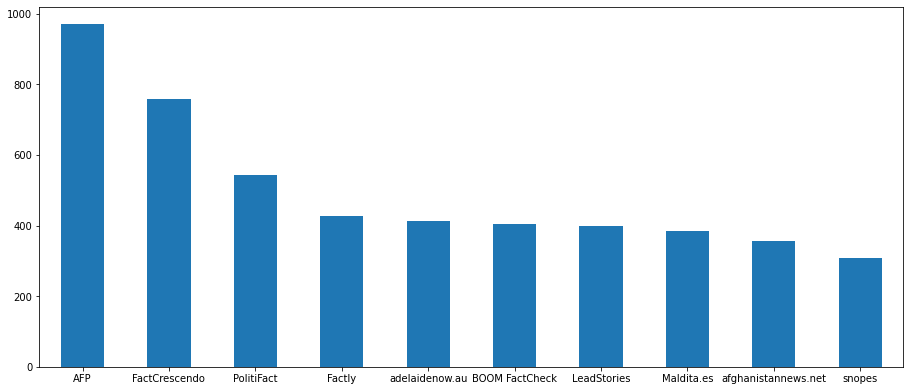

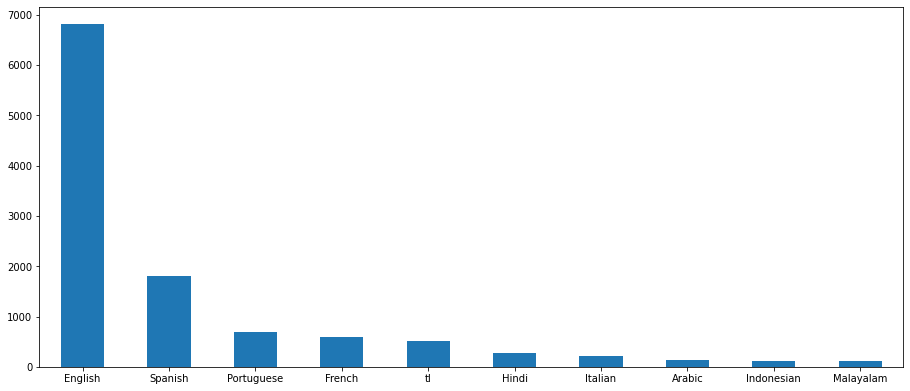

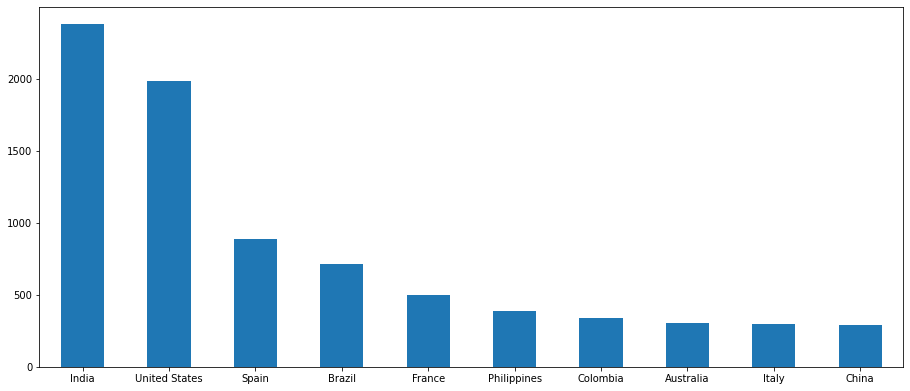

In [ ]:
# Grafico datos

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax = verificado_10.plot.bar(x='lab', y='val', rot=0)

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax = lang_10.plot.bar(x='lab', y='val', rot=0)

fig = plt.figure(figsize=(12,5))
ax = fig.add_axes([0,0,1,1])
ax = country_10.plot.bar(x='lab', y='val', rot=0)

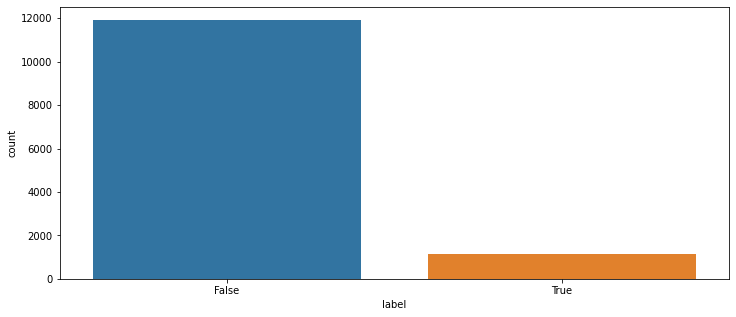

In [ ]:
# Distribución de las categorías datos
plt.figure(figsize=(12,5))
sns.countplot("label", data=datos3)
plt.show()

In [ ]:
# Filtro datos sólo en inglés
datos_ingles=datos3[datos3['lang']=="English"]
len(datos_ingles)

6817

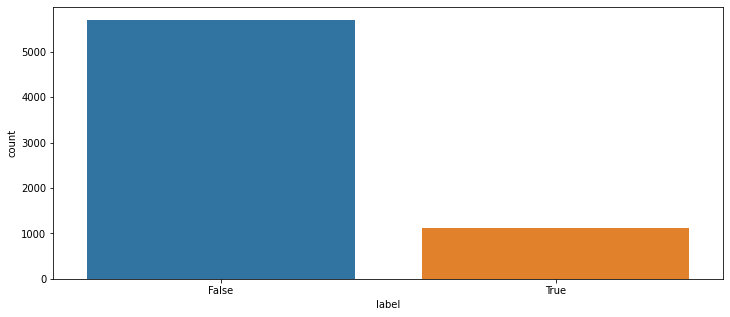

In [ ]:
# Distribución de las categorías datos de trabajo filtrados en idioma inglés
plt.figure(figsize=(12,5))
sns.countplot("label", data=datos_ingles)
plt.show()

### Creación de conjuntos de datos

In [ ]:
# Reservo unos datos para pruebas finales (datos que no se tocan)

datos_trabajo,datos_reserva = train_test_split(datos_ingles, test_size=0.1, random_state=88 )
datos_trabajo=datos_trabajo.reset_index()
datos_trabajo=datos_trabajo.drop(["index"], axis=1)

datos_reserva=datos_reserva.reset_index()
datos_reserva=datos_reserva.drop(["index"], axis=1)

print("Datos para trabajar: ", len(datos_trabajo))
print("Datos reservados para pruebas finales ", len(datos_reserva))



Datos para trabajar:  6135
Datos reservados para pruebas finales  682


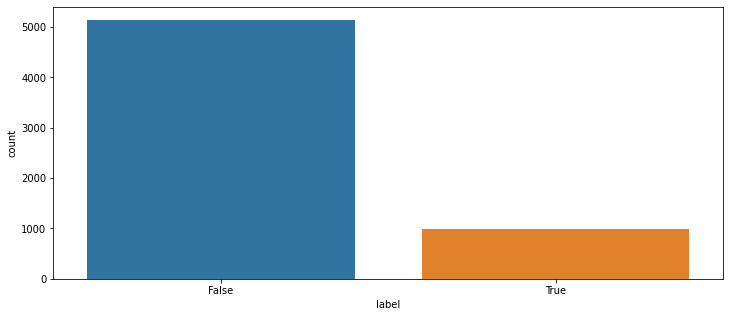

In [ ]:
# Distribución de las categorías datos de trabajo
plt.figure(figsize=(12,5))
sns.countplot("label", data=datos_trabajo)
plt.show()

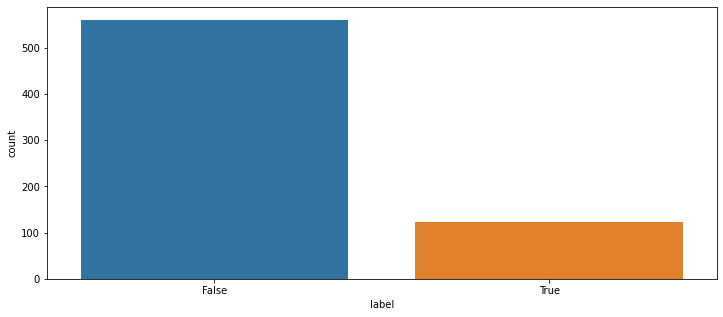

In [ ]:
# Distribución de las categorías datos reservados
plt.figure(figsize=(12,5))
sns.countplot("label", data=datos_reserva)
plt.show()

In [ ]:
datos_trabajo.head(10)

,Text,country,lang,label,URL,date,verificado_por
0,Australian hospital staff rolled in a Wilson ...,United States,English,False,https://hoax-alert.leadstories.com/3471894-fac...,2020/03/12,LeadStories
1,WHO declared COVID-19 to be the abbreviation f...,India,English,False,https://english.factcrescendo.com/2020/02/14/w...,2020-02-14 00:00:00,FactCrescendo
2,Claims of cures for COVID-19 from multiple cou...,Sri Lanka,English,False,https://srilanka.factcrescendo.com/english/fac...,2020-02-03 00:00:00,srilanka.factcrescendo
3,The government was supposedly not buying evid...,Spain,English,False,https://maldita.es/malditobulo/2020/03/29/gobi...,2020-03-24 00:00:00,maldita.es
4,Industrialist Ratan Tata’s view on economic do...,India,English,False,https://english.factcrescendo.com/2020/04/11/f...,2020-04-11 00:00:00,FactCrescendo
5,India announced holidays for four states.,India,English,False,https://www.boomlive.in/fast-check/fake-letter...,2020/03/13,BOOM FactCheck
6,Publication broadcasts a video of “the market ...,North Macedonia,English,False,https://truthmeter.mk/the-market-of-terror-is-...,2020-01-30 00:00:00,Vistinomer
7,Lockdown in Telangana extended till 3 June 2020.,India,English,False,https://factly.in/no-the-lockdown-has-not-been...,2020-04-04 00:00:00,Factly
8,The Indian health department has issued a noti...,India,English,False,https://www.boomlive.in/health/hoax-alert-vira...,2020-03-02 00:00:00,boomlive.in
9,Demonstrations against Chinese people in Italy.,France,English,False,https://observers.france24.com/fr/20200311-cor...,2020-02-14 00:00:00,observers.france24


###  Preparación de los datos

In [ ]:
# Convierto categorías en números - datos de trabajo

category_dict = {value:index for index, value in enumerate(datos_trabajo["label"].unique())} # Extraigo categorías de todos los datos


# Extraigo datos de titulares
corpus_trabajo = datos_trabajo["Text"]
results_trabajo = datos_trabajo["label"].map(category_dict)
#category_dict_trabajo
datos_trabajo["label"]

0       False
1       False
2       False
3       False
4       False
        ...  
6130    False
6131    False
6132    False
6133    False
6134    False
Name: label, Length: 6135, dtype: bool

In [ ]:
category_dict

{False: 0, True: 1}

In [ ]:
corpus_trabajo

0        Australian hospital staff rolled in a Wilson ...
1       WHO declared COVID-19 to be the abbreviation f...
2       Claims of cures for COVID-19 from multiple cou...
3        The government was supposedly not buying evid...
4       Industrialist Ratan Tata’s view on economic do...
                              ...                        
6130     Congress included include a raise for themsel...
6131    Indian Army has constructed an advanced hospit...
6132     Singer Gusttavo Lima says â€�never saw a pres...
6133     This photo shows a pregnant woman suffering f...
6134     â€śKochi Prefectural Assembly, who returned f...
Name: Text, Length: 6135, dtype: object

In [ ]:
# Convierto categorías en números - datos de trabajo

# Extraigo datos de titulares
corpus_trabajo = datos_trabajo["Text"]
results_trabajo = datos_trabajo["label"].map(category_dict)
#category_dict_trabajo
datos_trabajo["label"]

0       False
1       False
2       False
3       False
4       False
        ...  
6130    False
6131    False
6132    False
6133    False
6134    False
Name: label, Length: 6135, dtype: bool

In [ ]:
results_trabajo

0       0
1       0
2       0
3       0
4       0
       ..
6130    0
6131    0
6132    0
6133    0
6134    0
Name: label, Length: 6135, dtype: int64

In [ ]:
# Convierto categorías en números - datos de reserva

# Extraigo datos de titulares
corpus_reserva = datos_reserva["Text"]

# Construyo mapa de categorías
results_reserva = datos_reserva["label"].map(category_dict) # Mapeo categorías con el mismo diccionario (category_dict)

In [ ]:
datos_reserva["label"]

0      False
1      False
2       True
3      False
4      False
       ...  
677    False
678    False
679    False
680    False
681    False
Name: label, Length: 682, dtype: bool

In [ ]:
results_reserva

0      0
1      0
2      1
3      0
4      0
      ..
677    0
678    0
679    0
680    0
681    0
Name: label, Length: 682, dtype: int64

In [ ]:
# Parámetros
n_most_common_words = 10000
max_len = 300


# Creo tokenizador con todos los datos
corpus = datos3["Text"]
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(corpus.values)
word_index = tokenizer.word_index
print('Se encontraron %s tokens únicos' % len(word_index))

Se encontraron 24703 tokens únicos


In [ ]:
# Tokenización datos de trabajo

corpus_trabajo = datos_trabajo["Text"]
sequences = tokenizer.texts_to_sequences(corpus_trabajo.values)
X = pad_sequences(sequences, maxlen=max_len)

In [ ]:
# Tokenización datos de reserva para pruebas

corpus_reserva = datos_reserva["Text"]
sequences_reserva = tokenizer.texts_to_sequences(corpus_reserva.values)
X_reserva = pad_sequences(sequences_reserva, maxlen=max_len)

In [ ]:
X_reserva[120]

array([ 930,  467,  931,    5,  468,  209, 1052,  466,  429,  673,  932,
        240,  463,  933,    2,  492,  397,  781,  934,  465,  240,  935,
       1136, 2015, 3700,  107,   83,  234,    4,  138,    2, 4338,  124,
        936,  469,  937,  938,  469,  939,   96,    2,  608,  940,  814,
       3701, 1147, 1859,    4,    7,  107,  146,   29, 1659,    2, 2447,
        201,    9,  782,   10,  478,  432,  432,  123,  327,   72,  232,
         37, 1693,   10,  134, 1207,  197,    1, 3702,    5,  286,  121,
          6, 2616,  318,  517,    2, 2448,  269,   11,   52,   16,  684,
       1311,   11,   52,   44,    6,  176,  253, 2016,    2,  392,   48,
         10,  184,    8,   35, 2204,  642,    6,    4, 1824, 1276,  334,
         30,   40,   20,  605, 1347,   71,   26,   79, 1936,   86,  989,
        371,   13,   48,    2,  449,   25,  508,  582,  336, 2734,    1,
        142,  394,   83,   17,   35, 1376,    9,    1,  301,  753,  976,
         65,  583,   56,    1,  236,   26,   83,  1

### Train - Test split

In [ ]:
# Train - Test Split

x_train,x_test, y_train,y_test = train_test_split(X, results_trabajo, test_size=0.2, random_state=88 )

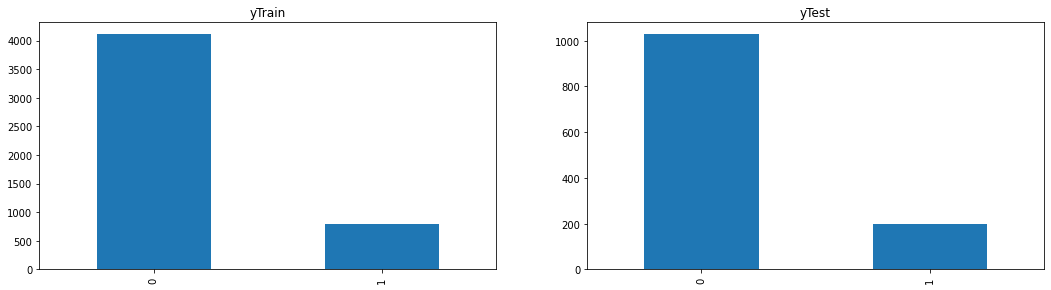

In [ ]:
# Visualizo el balance de las clases luego de la división para verificar que no exista un desbalance
df_y_train = pd.DataFrame({'yTrain': y_train})

df_y_test = pd.DataFrame({'yTest': y_test})


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 10))
plt.subplot(2, 2, 1).set_title('yTrain')
df_y_train["yTrain"].value_counts().plot(kind='bar')

plt.subplot(2, 2, 2).set_title('yTest')
df_y_test["yTest"].value_counts().plot(kind='bar')

### Comparación de modelos de aprendizaje automático


In [ ]:
# Comparación de modelos
# Listado de modelos
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    ]

In [ ]:
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

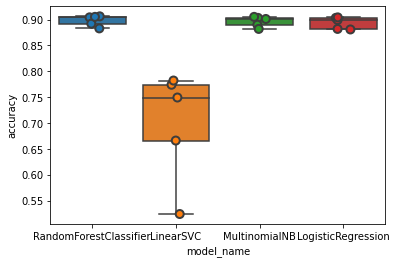

In [ ]:
# Gráfico comparativo de la precisión estimada de los modelos
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

#### Modelo Random Forest

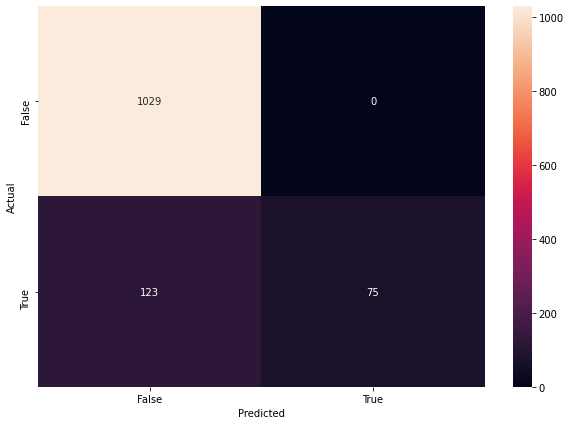

In [ ]:
# Modelo RandomForest
from sklearn.metrics import confusion_matrix

modelRF = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
modelRF.fit(x_train, y_train)
y_pred = modelRF.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Modelo logistic

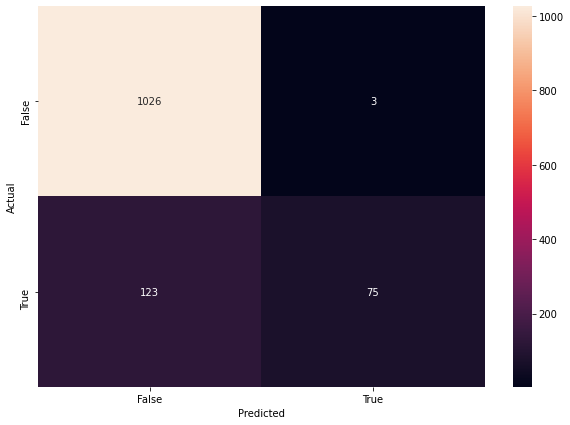

In [ ]:
# Modelo Logistic
from sklearn.metrics import confusion_matrix

modelLOG = LogisticRegression(random_state=0)
modelLOG.fit(x_train, y_train)
y_pred = modelLOG.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Modelo vector de soporte lineal

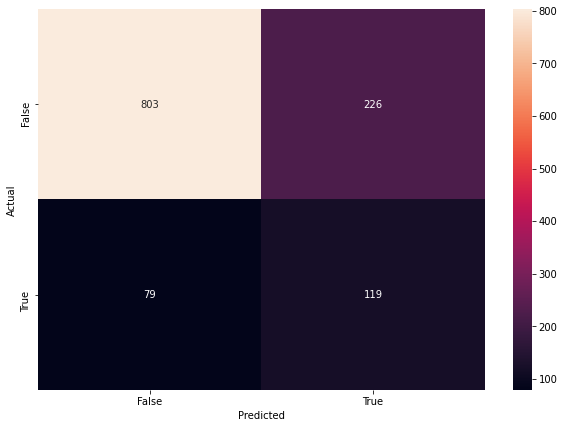

In [ ]:
# Modelo Vector Soporte Lineal
from sklearn.metrics import confusion_matrix

modelSVC = LinearSVC()
modelSVC.fit(x_train, y_train)
y_pred = modelSVC.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Modelo Naïve Bayes

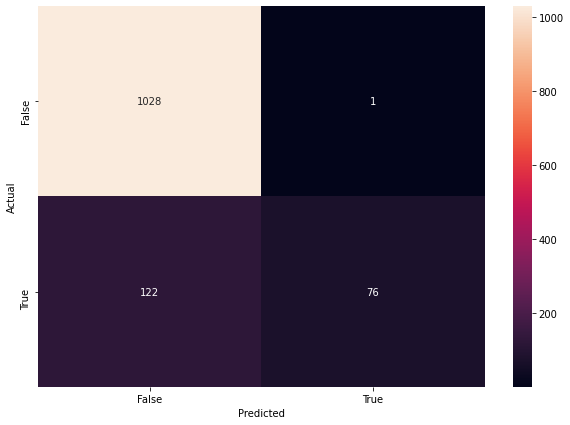

In [ ]:
# Modelo Multinomial Naive Bayes
from sklearn.metrics import confusion_matrix

modelNB = MultinomialNB()
modelNB.fit(x_train, y_train)
y_pred = modelNB.predict(x_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_dict, yticklabels=category_dict)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### Prueba de modelos de aprendizaje automático

In [ ]:
datos_reserva[datos_reserva["label"]==True].head(29)

,Text,country,lang,label,URL,date,verificado_por
2,PIA announces special flights as Saudi Arabia ...,Saudi Arabia,English,True,http://www.aaj.tv/english/national/pia-announc...,2020-03-07 00:00:00,aaj.tv
7,Patel on budget cuts: We have to go further on...,China,English,True,https://www.afghanistannews.net/news/264207692...,2020-02-28 00:00:00,afghanistannews.net
12,"Forget sexy projects, SA needs a pothole-led s...",Australia,English,True,https://www.adelaidenow.com.au/news/south-aust...,2020-02-26 00:00:00,adelaidenow.au
22,â€śBill Gates told us about the coronavirus in...,United States,English,True,https://www.politifact.com/factchecks/2020/mar...,2020-02-12 00:00:00,politifact
37,Equities dither amid mixed global cues after c...,India,English,True,https://www.afghanistannews.net/news/264130268...,2020-03-02 00:00:00,afghanistannews.net
51,Washington State Reports 1st Coronavirus Death...,United States,English,True,https://www.afghanistannews.net/news/264176953...,2020-02-28 00:00:00,afghanistannews.net
52,LATEST: All of Italy locked down | Qantas cuts...,Italy,English,True,https://www.adelaidenow.com.au/news/south-aust...,2020-05-03 00:00:00,adelaidenow.au
58,British researchers have published terrifying ...,China,English,True,https://www.adelaidenow.com.au/lifestyle/healt...,2020-09-03 00:00:00,adelaidenow.au
60,Local stocks retreat as resources struggle,United States,English,True,https://www.afghanistannews.net/news/263913261...,2020-12-03 00:00:00,afghanistannews.net
63,JSE losses deepen as stock rout continues,China,English,True,https://www.afghanistannews.net/news/264154718...,2020-09-03 00:00:00,afghanistannews.net


In [ ]:
datos_reserva.head(29)

,Text,country,lang,label,URL,date,verificado_por
0,Existence of a vaccination summit may be a si...,Georgia,English,False,http://mythdetector.ge/en/myth/are-vaccines-te...,2020/06/11,Myth Detector
1,The reproduction rate for the coronavirus in G...,United States,English,True,https://reuters.com,NaN,Reuters
2,"3,500 Italians potentially infected with the n...",Brazil,English,False,https://aosfatos.org/noticias/e-falso-que-3500...,2020-02-29 00:00:00,Aos Fatos
3,The Indian Army has been called to control sev...,India,English,False,https://www.boomlive.in/fake-news/false-army-c...,2020-04-03 00:00:00,BOOM FactCheck
4,Says Queen Elizabeth said Philippine President...,United States,English,False,https://www.politifact.com/factchecks/2020/apr...,2020-04-06 00:00:00,PolitiFact
5,The U.S. Centers for Disease Control and Preve...,United States,English,True,https://reuters.com,NaN,Reuters
6,Brazil's health regulator Anvisa on Tuesday au...,United States,English,True,https://reuters.com,NaN,Reuters
7,Ugandan President Kaguta Museveni and Prime M...,Uganda,English,False,https://pesacheck.org/false-ugandan-president-...,2020/06/09,PesaCheck
8,A video has been viewed thousands of times on...,Malaysia,English,False,https://factcheck.afp.com/video-shows-safety-d...,2020/04/09,AFP
9,“Bill Gates Explains That The COVID Vaccine W...,United States,English,False,https://www.politifact.com/factchecks/2020/may...,2020/05/20,PolitiFact


In [ ]:
# Prueba con textos de datos de reserva

text1=datos_reserva["Text"][15]
text2=datos_reserva["Text"][25]
text3=datos_reserva["Text"][57]

print("Texto 1: ", text1)
print("Categoria real: ",datos_trabajo["label"][15])

print("Texto 2: ", text2)
print("Categoria real: ",datos_reserva["label"][25])

print("Texto 3: ", text3)
print("Categoria real: ",datos_reserva["label"][57])

Texto 1:   Having a beard increases your chances of getting coronavirus.
Categoria real:  False
Texto 2:   China “stole coronavirus from Canada and weaponized it into a Bioweapon.”
Categoria real:  False
Texto 3:  India reported a record daily increase of novel coronavirus cases on Friday and became the world's fourth worst-hit country, raising the prospect of the return of a lockdown just days after it was lifted.
Categoria real:  True


In [ ]:
datos_reserva.head(6)

,Text,country,lang,label,URL,date,verificado_por
0,Existence of a vaccination summit may be a si...,Georgia,English,False,http://mythdetector.ge/en/myth/are-vaccines-te...,2020/06/11,Myth Detector
1,The reproduction rate for the coronavirus in G...,United States,English,True,https://reuters.com,NaN,Reuters
2,"3,500 Italians potentially infected with the n...",Brazil,English,False,https://aosfatos.org/noticias/e-falso-que-3500...,2020-02-29 00:00:00,Aos Fatos
3,The Indian Army has been called to control sev...,India,English,False,https://www.boomlive.in/fake-news/false-army-c...,2020-04-03 00:00:00,BOOM FactCheck
4,Says Queen Elizabeth said Philippine President...,United States,English,False,https://www.politifact.com/factchecks/2020/apr...,2020-04-06 00:00:00,PolitiFact
5,The U.S. Centers for Disease Control and Preve...,United States,English,True,https://reuters.com,NaN,Reuters


In [ ]:
# Función para prueba

def news_alert(a, modelo_probar):
    clf=modelo_probar
    # Tokenizacion
    corpus_1=[]
    corpus_1.append(a)
    corpus_2=pd.Series(corpus_1)
    sequences_reserva = tokenizer.texts_to_sequences(corpus_2.values)
    transform_vect_reserva= pad_sequences(sequences_reserva, maxlen=max_len)
    #print(transform_vect_reserva)
    
    prediccion=clf.predict(transform_vect_reserva)
    prediccion_a = [np.array(prediccion)]
    print(prediccion)    

    if prediccion == 1:
       print("Alerta")
    else:
      print("No alerta")

In [ ]:
clasificar_texto=text2
print(clasificar_texto)

print("Modelo RF")
print(news_alert(clasificar_texto, modelRF))

 China “stole coronavirus from Canada and weaponized it into a Bioweapon.”
Modelo RF
[1]
Alerta
None


In [ ]:
# Prueba con función

# 1 alerta
# 0 no alerta

clasificar_texto=text1
print(clasificar_texto)

print("Modelo RF")
print(news_alert(clasificar_texto, modelRF))

print(" ")
print("Modelo LOG")
print(news_alert(clasificar_texto, modelLOG))

print(" ")
print("Modelo SVC")
print(news_alert(clasificar_texto, modelSVC))

print(" ")
print("Modelo NB")
print(news_alert(clasificar_texto, modelNB))


 Having a beard increases your chances of getting coronavirus.
Modelo RF
[1]
Alerta
None
 
Modelo LOG
[1]
Alerta
None
 
Modelo SVC
[1]
Alerta
None
 
Modelo NB
[1]
Alerta
None


In [ ]:
news_alert(clasificar_texto, modelLOG)

[1]
Alerta


#### Generación de archivos de modelos de aprendizaje automático

In [ ]:
## Guardo los modelos en archivos


filename = 'SVC_model.pkl'
joblib.dump(modelSVC, filename)

filename = 'NB_model.pkl'
joblib.dump(modelNB, filename)

filename = 'LOG_model.pkl'
joblib.dump(modelLOG, filename)

filename = 'RF_model.pkl'
joblib.dump(modelRF, filename)

filename = 'tokenizer.pkl'
joblib.dump(tokenizer, filename)


['tokenizer.pkl']

### Comparación de modelos de aprendizaje profundo

#### Modelo base inicial

In [ ]:
# Parámetros de la red
epochs = 20
emb_dim = 128
batch_size = 256

In [ ]:
# Creación del modelo y compilación

model_base = tf.keras.Sequential([
    tf.keras.layers.Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_base.summary()

# Compilación

model_base.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 300, 128)          1280000   
_________________________________________________________________
flatten_36 (Flatten)         (None, 38400)             0         
_________________________________________________________________
dense_69 (Dense)             (None, 32)                1228832   
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 33        
Total params: 2,508,865
Trainable params: 2,508,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Entrenamiento

start=time.clock()


history_base = model_base.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

end = time.clock()
tiempo_base=(end-start)/60
print("Tiempo de entrenamiento: ", tiempo_base, " minutos")

Epoch 1/20
16/16 [==============================] - 1s 78ms/step - loss: 0.3723 - acc: 0.8935 - val_loss: 0.3003 - val_acc: 0.9043
Epoch 2/20
16/16 [==============================] - 1s 70ms/step - loss: 0.2935 - acc: 0.8966 - val_loss: 0.2580 - val_acc: 0.9043
Epoch 3/20
16/16 [==============================] - 1s 70ms/step - loss: 0.2431 - acc: 0.8966 - val_loss: 0.2205 - val_acc: 0.9043
Epoch 4/20
16/16 [==============================] - 1s 71ms/step - loss: 0.1907 - acc: 0.9014 - val_loss: 0.1911 - val_acc: 0.9104
Epoch 5/20
16/16 [==============================] - 1s 71ms/step - loss: 0.1500 - acc: 0.9399 - val_loss: 0.1765 - val_acc: 0.9175
Epoch 6/20
16/16 [==============================] - 1s 69ms/step - loss: 0.1226 - acc: 0.9631 - val_loss: 0.1709 - val_acc: 0.9206
Epoch 7/20
16/16 [==============================] - 1s 71ms/step - loss: 0.1040 - acc: 0.9773 - val_loss: 0.1766 - val_acc: 0.9165
Epoch 8/20
16/16 [==============================] - 1s 71ms/step - loss: 0.0894 - a

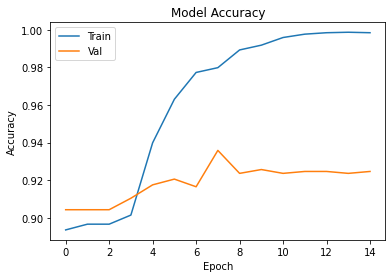

In [ ]:
# Resultados

# Accuracy
plot_acc(history_base)

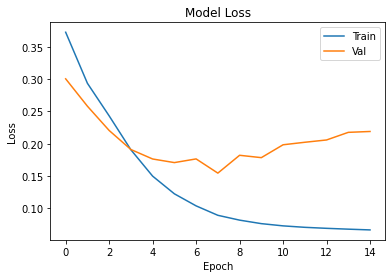

In [ ]:
# Loss
plot_loss(history_base)

#### Modelo redes convolucionales - CNN

In [ ]:
# Parámetros de la red
epochs = 20
emb_dim = 128
batch_size = 256

In [ ]:
# Creación del modelo y compilación

model_CNN = tf.keras.Sequential([
    tf.keras.layers.Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]),
    tf.keras.layers.Conv1D(8, 2, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_CNN.summary()

# Compilación

model_CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 300, 128)          1280000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 299, 8)            2056      
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 8)                 0         
_________________________________________________________________
flatten_37 (Flatten)         (None, 8)                 0         
_________________________________________________________________
dense_71 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 33        
Total params: 1,282,377
Trainable params: 1,282,377
Non-trainable params: 0
___________________________________________

In [ ]:
# Entrenamiento

start=time.clock()


history_CNN = model_CNN.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

end = time.clock()
tiempo_CNN=(end-start)/60
print("Tiempo de entrenamiento: ", tiempo_CNN, " minutos")

Epoch 1/20
16/16 [==============================] - 2s 108ms/step - loss: 0.6104 - acc: 0.8380 - val_loss: 0.5265 - val_acc: 0.8371
Epoch 2/20
16/16 [==============================] - 2s 100ms/step - loss: 0.4585 - acc: 0.8380 - val_loss: 0.4110 - val_acc: 0.8371
Epoch 3/20
16/16 [==============================] - 2s 100ms/step - loss: 0.3804 - acc: 0.8380 - val_loss: 0.3807 - val_acc: 0.8371
Epoch 4/20
16/16 [==============================] - 2s 98ms/step - loss: 0.3432 - acc: 0.8380 - val_loss: 0.3438 - val_acc: 0.8371
Epoch 5/20
16/16 [==============================] - 2s 99ms/step - loss: 0.2979 - acc: 0.8418 - val_loss: 0.3013 - val_acc: 0.8635
Epoch 6/20
16/16 [==============================] - 2s 99ms/step - loss: 0.2434 - acc: 0.8912 - val_loss: 0.2593 - val_acc: 0.9053
Epoch 7/20
16/16 [==============================] - 2s 98ms/step - loss: 0.1850 - acc: 0.9172 - val_loss: 0.2246 - val_acc: 0.9094
Epoch 8/20
16/16 [==============================] - 2s 99ms/step - loss: 0.1325 

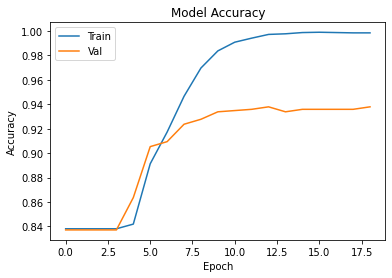

In [ ]:
# Resultados

# Accuracy
plot_acc(history_CNN)

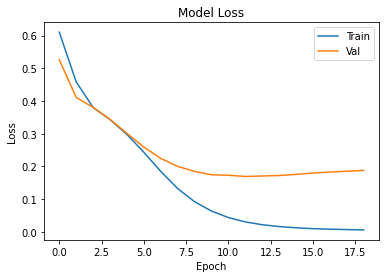

In [ ]:
# Loss

plot_loss(history_CNN)

#### Modelo redes recurrentes - RNN

In [ ]:
# Parámetros de la red
epochs = 20
emb_dim = 128
batch_size = 256

In [ ]:
# Creación del modelo y compilación

model_RNN = tf.keras.Sequential([
    tf.keras.layers.Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]),
    tf.keras.layers.SpatialDropout1D(0.1),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_RNN.summary()

# Compilación

model_RNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, 300, 128)          1280000   
_________________________________________________________________
spatial_dropout1d_14 (Spatia (None, 300, 128)          0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 64)                49408     
_________________________________________________________________
flatten_44 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_86 (Dense)             (None, 1)               

In [ ]:
# Entrenamiento
start=time.clock()

history_RNN = model_RNN.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

end = time.clock()
tiempo_RNN=(end-start)/60
print("Tiempo de entrenamiento: ", tiempo_RNN, " minutos")


Epoch 1/20
16/16 [==============================] - 13s 803ms/step - loss: 0.5422 - acc: 0.8207 - val_loss: 0.3988 - val_acc: 0.8371
Epoch 2/20
16/16 [==============================] - 13s 786ms/step - loss: 0.3655 - acc: 0.8752 - val_loss: 0.3140 - val_acc: 0.9022
Epoch 3/20
16/16 [==============================] - 12s 781ms/step - loss: 0.2451 - acc: 0.9154 - val_loss: 0.2040 - val_acc: 0.9328
Epoch 4/20
16/16 [==============================] - 12s 780ms/step - loss: 0.1432 - acc: 0.9552 - val_loss: 0.1579 - val_acc: 0.9409
Epoch 5/20
16/16 [==============================] - 13s 784ms/step - loss: 0.0803 - acc: 0.9730 - val_loss: 0.1313 - val_acc: 0.9593
Epoch 6/20
16/16 [==============================] - 13s 783ms/step - loss: 0.0410 - acc: 0.9850 - val_loss: 0.1480 - val_acc: 0.9562
Epoch 7/20
16/16 [==============================] - 13s 787ms/step - loss: 0.0223 - acc: 0.9934 - val_loss: 0.1733 - val_acc: 0.9532
Epoch 8/20
16/16 [==============================] - 13s 795ms/step - 

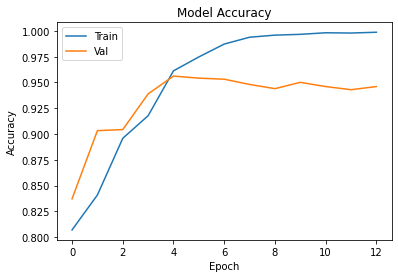

In [ ]:
# Resultados

# Accuracy
plot_acc(history_RNN)

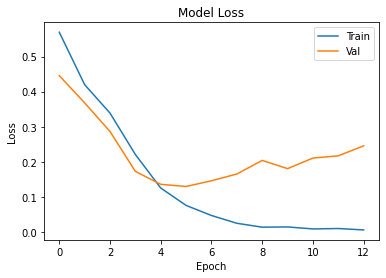

In [ ]:
# Loss

plot_loss(history_RNN)

#### Comparación de los modelos

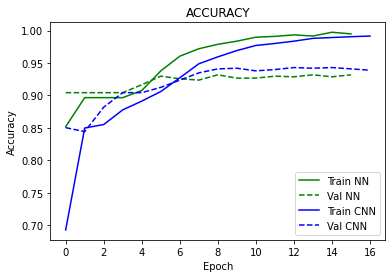

In [ ]:
# Comparación Base vs CNN - Accuracy
plot_compare_accs(history_base, history_CNN, 'NN', 'CNN', 'ACCURACY')

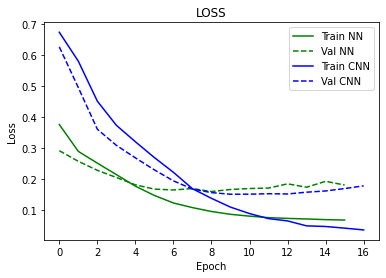

In [ ]:
# Comparación Base vs CNN - Loss
plot_compare_losses(history_base, history_CNN, 'NN', 'CNN', 'LOSS')

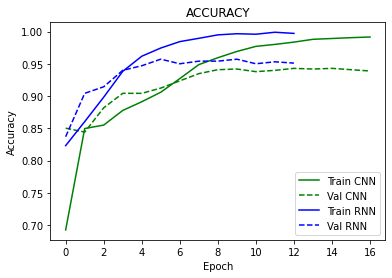

In [ ]:
# Comparación CNN vs RNN - Accuracy
plot_compare_accs(history_CNN, history_RNN, 'CNN', 'RNN', 'ACCURACY')

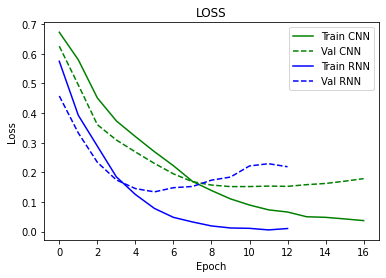

In [ ]:
# Comparación CNN vs RNN - Loss
plot_compare_losses(history_CNN, history_RNN, 'CNN', 'RNN', 'LOSS')

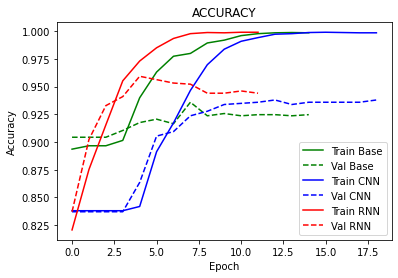

In [ ]:
# Comparación de los 3 modelos - Accuracy
plot_compare_accs3(history_base, history_CNN, history_RNN, 'Base', 'CNN', 'RNN', 'ACCURACY')

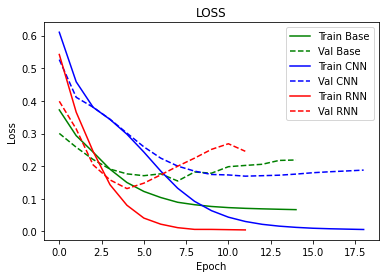

In [ ]:
# Comparación de los 3 modelos - Loss
plot_compare_losses3(history_base, history_CNN, history_RNN, 'Base', 'CNN', 'RNN', 'LOSS')

#### Prueba de modelos de aprendizaje profundo

In [ ]:
# Prueba con textos de datos de reserva

text1=datos_reserva["Text"][120]
text2=datos_reserva["Text"][18]
text3=datos_reserva["Text"][88]

print("Texto 1: ", text1)
print("Categoria real: ",datos_reserva["label"][120])

print("Texto 2: ", text2)
print("Categoria real: ",datos_reserva["label"][18])

print("Texto 3: ", text3)
print("Categoria real: ",datos_reserva["label"][88])

Texto 1:  Nearly 300,000 more people have died in the United States in 2020 during the coronavirus pandemic than would be expected based on historical trends, with at least two-thirds due to COVID-19, a government report released on Tuesday showed, adding that COVID deaths likely were undercounted.
Categoria real:  True
Texto 2:  A video purportedly showing COVID-19 victims in body bags strewn across the floor of a New York hospital was shared several thousand times in multiple languages on social media.
Categoria real:  False
Texto 3:  New cases of COVID-19 in England were rising by around 35,200 per day last week, up from 27,900 the week before, although there were tentative signs of a levelling-off around this rate, an official estimate showed on Friday.
Categoria real:  True


In [ ]:
# Función para prueba

def news_alert(a, modelo_probar):
    clf=modelo_probar
    # Tokenizacion
    corpus_1=[]
    corpus_1.append(a)
    corpus_2=pd.Series(corpus_1)
    sequences_reserva = tokenizer.texts_to_sequences(corpus_2.values)
    transform_vect_reserva= pad_sequences(sequences_reserva, maxlen=max_len)
    #print(transform_vect_reserva)
    
    prediccion=clf.predict(transform_vect_reserva)
    prediccion_a = [np.array(prediccion)]
    print(prediccion)    

    if prediccion > 0.5:
       print("Alerta")
    else:
      print("No alerta")

In [ ]:
# Prueba Única

test=datos_reserva["Text"][18]
  
corpus_t=[]
corpus_t.append(test)
corpus_t=pd.Series(corpus_t)
  
  
sequences_reserva = tokenizer.texts_to_sequences(corpus_t.values)
transform_vect_reserva= pad_sequences(sequences_reserva, maxlen=max_len)

transform_vect_reserva

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [ ]:
X_reserva[120]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
prediccion222=model_base.predict(transform_vect_reserva)

In [ ]:
len(prediccion222[0])

1

In [ ]:
model_RNN.predict(transform_vect_reserva)

array([[0.9999782]], dtype=float32)

In [ ]:
# Prueba con función

clasificar_texto=text2
print(clasificar_texto)

print("Modelo NN")
print(news_alert(clasificar_texto, model_base))

print(" ")
print("Modelo CNN")
print(news_alert(clasificar_texto, model_CNN))

print(" ")
print("Modelo RNN")
print(news_alert(clasificar_texto, model_RNN))

A video purportedly showing COVID-19 victims in body bags strewn across the floor of a New York hospital was shared several thousand times in multiple languages on social media.
Modelo NN
[[0.99997747]]
Alerta
None
 
Modelo CNN
[[0.9986323]]
Alerta
None
 
Modelo RNN
[[0.9999782]]
Alerta
None


#### Generación de archivos de modelos de aprendizaje profundo

In [ ]:
## Guardo los modelos en archivos


model_base.save('model_base.h5') 

model_CNN.save('model_CNN.h5') 

model_RNN.save('model_RNN.h5') 